# Examples of masks

## Creating an instance

In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

number of processors: 8


In [2]:
from matplotlib import rcParams
rcParams['figure.figsize']=[8,8]

In [3]:
wavelength=0.5*um
x0=np.linspace(-0.25*mm, 0.25*mm, 512)
y0=np.linspace(-0.25*mm, 0.25*mm, 512)

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength, info='u0')

## operations with masks

### adding masks

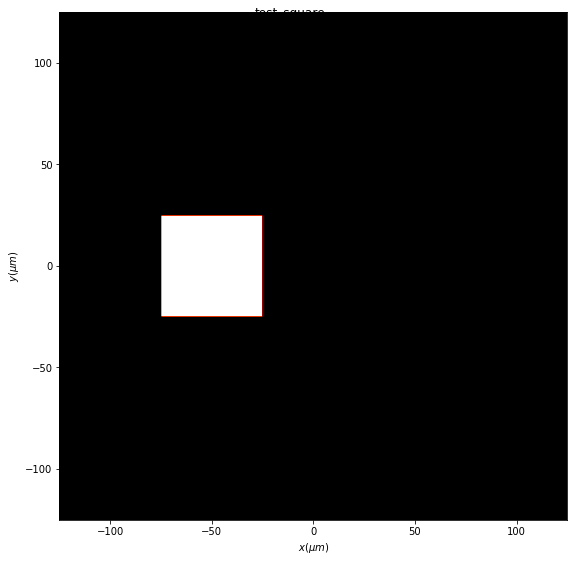

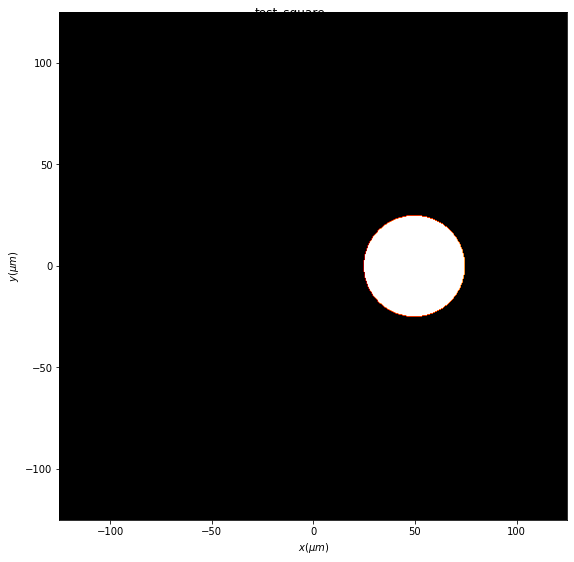

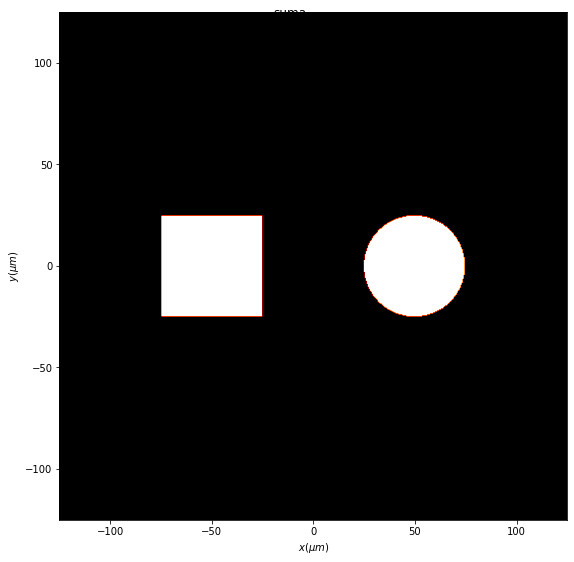

In [4]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.square(
    r0=(-50 * um, 0 * um), size=(50 * um, 50 * um), angle=0 * degrees)
t1.draw(title='test_square')

t2 = Scalar_mask_XY(x, y, wavelength)
t2.circle(
    r0=(50 * um, 0 * um), radius=(25 * um, 25 * um), angle=0 * degrees)
t2.draw(title='test_square')

t3 = t2 + t1
t3.draw(title='suma');

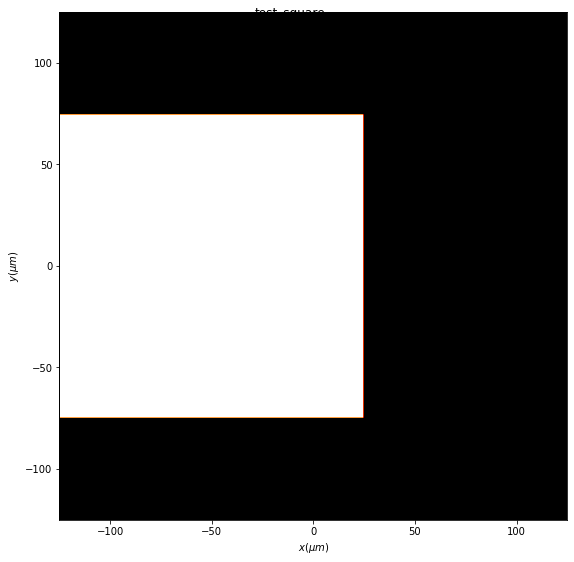

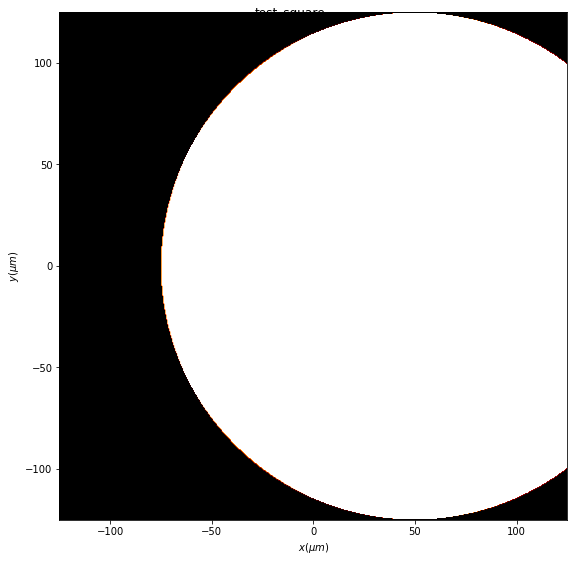

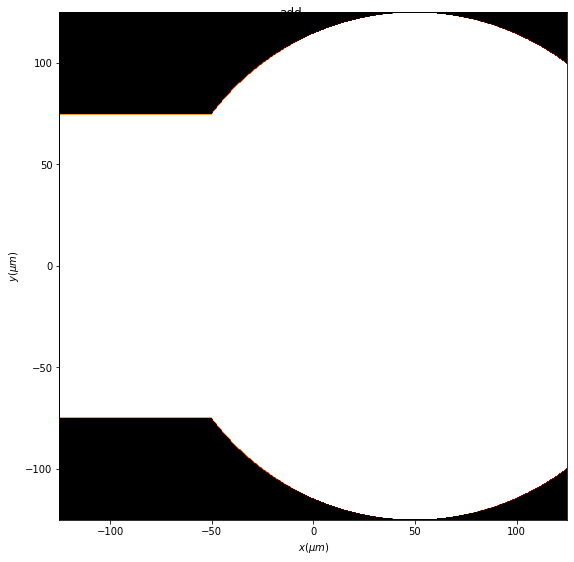

In [5]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.square(
    r0=(-50 * um, 0 * um),
    size=(150 * um, 150 * um),
    angle=0 * degrees)
t1.draw(title='test_square')

t2 = Scalar_mask_XY(x, y, wavelength)
t2.circle(
    r0=(50 * um, 0 * um),
    radius=(125 * um, 125 * um),
    angle=0 * degrees)
t2.draw(title='test_square')

t3 = t2.add(t1, 'maximum1')
t3.draw(title='add');

### Substracting masks

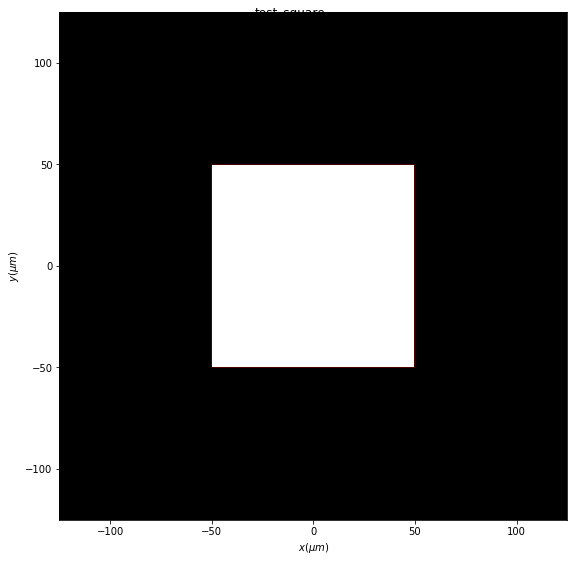

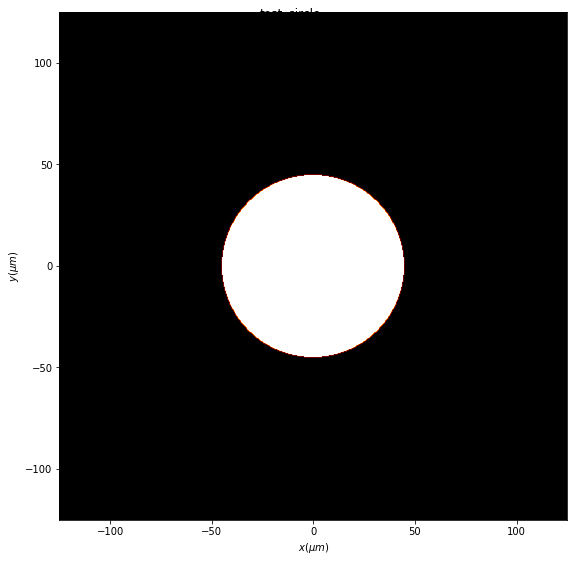

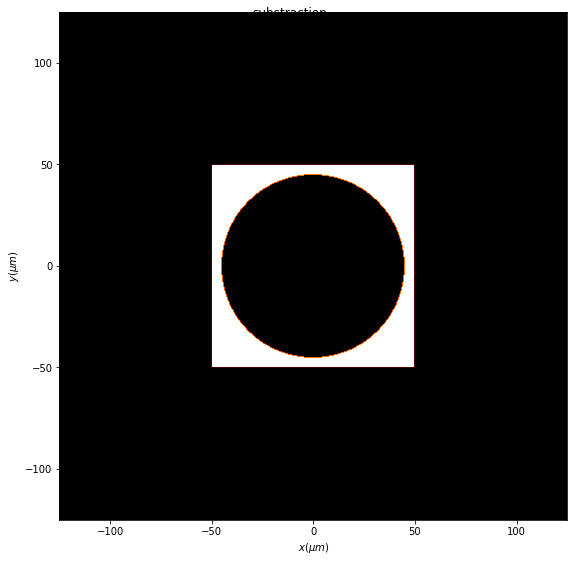

In [6]:

num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.square(
    r0=(0 * um, 0 * um), size=(100 * um, 100 * um), angle=0 * degrees)
t1.draw(title='test_square')

t2 = Scalar_mask_XY(x, y, wavelength)
t2.circle(
    r0=(0 * um, 0 * um), radius=(45 * um, 45 * um), angle=0 * degrees)
t2.draw(title='test_circle')

t3 = t2 - t1
t3.draw(title='substraction');

### binarize

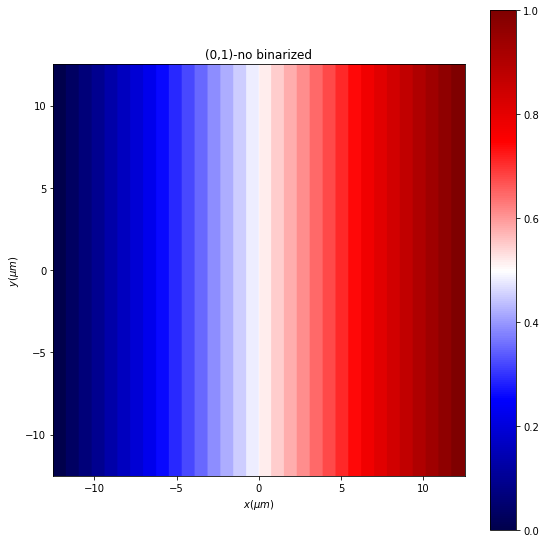

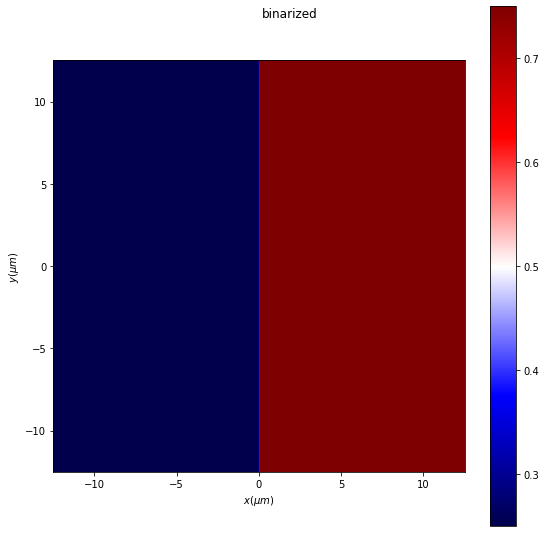

In [7]:
num_data = 512
length = 25 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.gray_scale(num_levels=32, levelMin=0, levelMax=1)
t1.draw(kind='amplitude', has_colorbar='vertical')
plt.title('(0,1)-no binarized')

t1.binarize(
    kind='amplitude',
    corte=None,
    level0=0.25,
    level1=.75,
    new_field=False,
    matrix=False)
t1.draw(kind='amplitude', has_colorbar='vertical')
plt.suptitle('binarized');


## General procedures to generate masks

### mask_phase_1

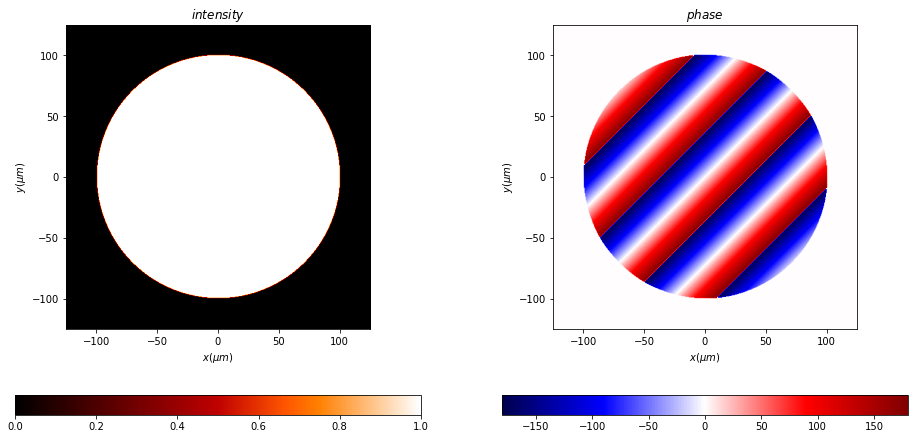

In [8]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.mask_from_function(
    r0=(0 * um, 0 * um),
    index=1.5,
    f1='1*degrees*self.Y',
    f2='1*degrees*self.X',
    v_globals=None,
    radius=(100 * um, 100 * um),
    mask=True)
t1.draw(kind='field');

### mask_phase_2

Lens with a curved surfaces and and spherical surfaces, defined by functions.

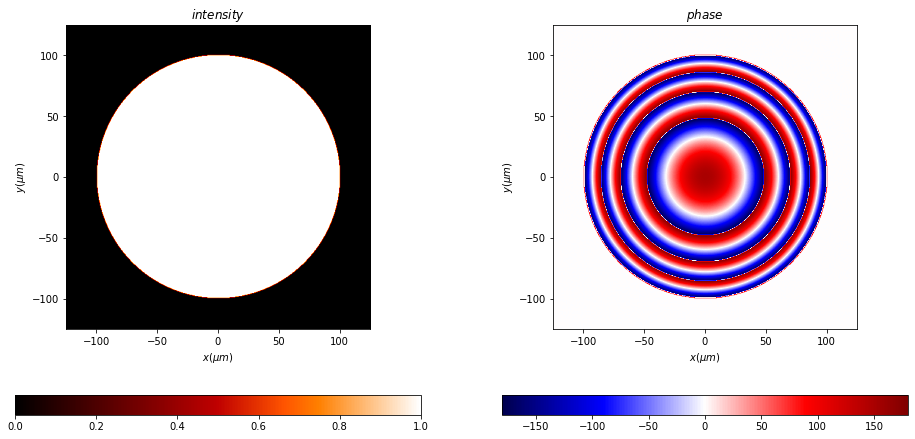

In [9]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

f1 = "np.zeros_like(self.X,dtype=float)"
f2 = "R2-h2+np.sqrt(R2**2-(self.X-x0)**2-(self.Y-y0)**2)"
v_globals = {
    'R1': 5 * mm,
    'R2': 1 * mm,
    'x0': 0 * um,
    'y0': 0 * um,
    'h1': 1 * mm,
    'h2': -1 * mm,
    'np': np,
}
index = 1.5

t1 = Scalar_mask_XY(x, y, wavelength)
t1.mask_from_function(
    r0=(0 * um, 0 * um),
    index=index,
    f1=f1,
    f2=f2,
    v_globals=v_globals,
    radius=(100 * um, 100 * um),
    mask=True)
t1.draw(kind='field')

focal = v_globals['R2'] / (index - 1)

### insert_array_masks

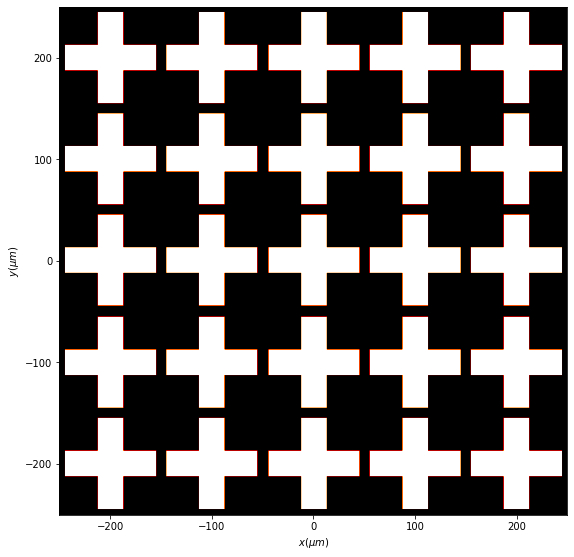

In [10]:
x = np.linspace(-250 * um, 250 * um, 512)
y = np.linspace(-250 * um, 250 * um, 512)
wavelength = 1 * um

s = Scalar_mask_XY(x, y, wavelength)
s.cross(
    r0=(0 * um, 0 * um), size=(90 * um, 25 * um), angle=0 * degrees)

t1 = Scalar_mask_XY(x, y, wavelength)
num_points = t1.insert_array_masks(
    t1=s,
    space=[100 * um, 100 * um],
    margin=50 * um,
    angle=90 * degrees)
t1.draw(kind='intensity');

### Slit

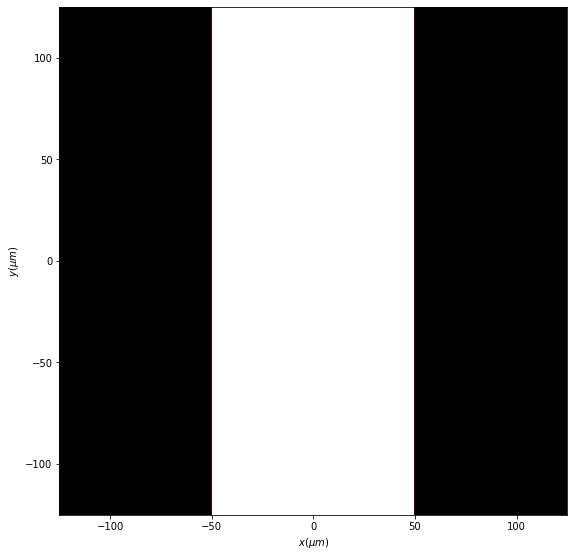

In [11]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.slit(x0=0, size=100 * um, angle=0 * degrees)
t1.draw(kind='intensity');

### sinusoidal slit

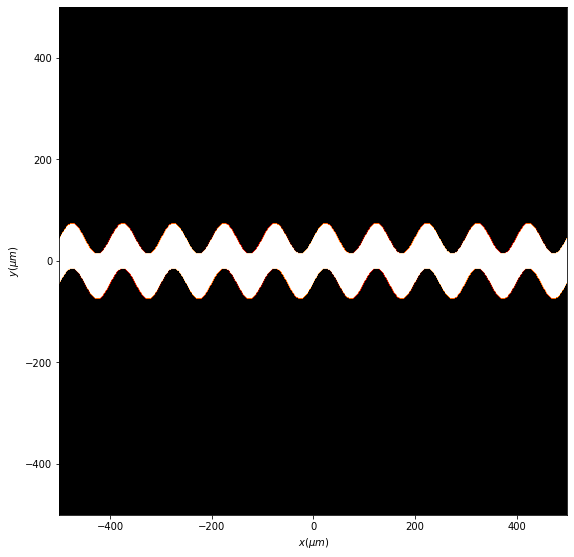

In [12]:
x = np.linspace(-500 * um, 500 * um, 512)
y = np.linspace(-500 * um, 500 * um, 512)
wavelength = 1 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.sinusoidal_slit(
    x0=0 * um,
    size=90,
    amplitude=30 * um,
    phase=0 * degrees,
    angle=0 * degrees,
    period=100 * um)
t1.draw(kind='intensity');

### hiperellipse

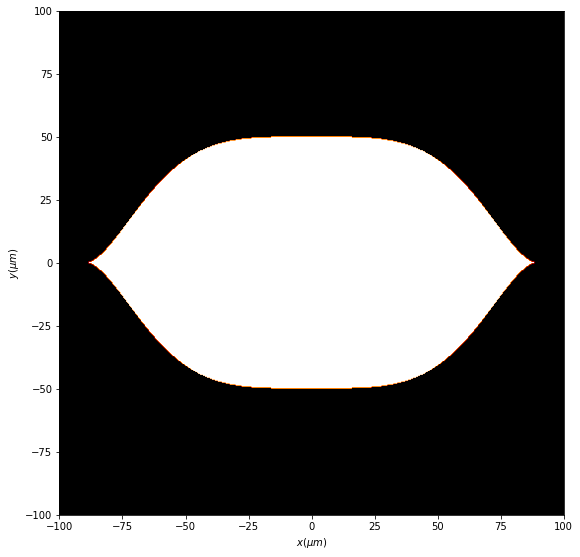

In [13]:
x = np.linspace(-100 * um, 100 * um, 512)
y = np.linspace(-100 * um, 100 * um, 512)
wavelength = 1 * um

t1 = Scalar_mask_XY(x, y, wavelength)

t1.hiper_ellipse(
    r0=(0, 0),
    radius=(50 * um, 90 * um),
    angle=90 * degrees,
    n=[0.5, 4])
t1.draw(kind='intensity');

### double_slit

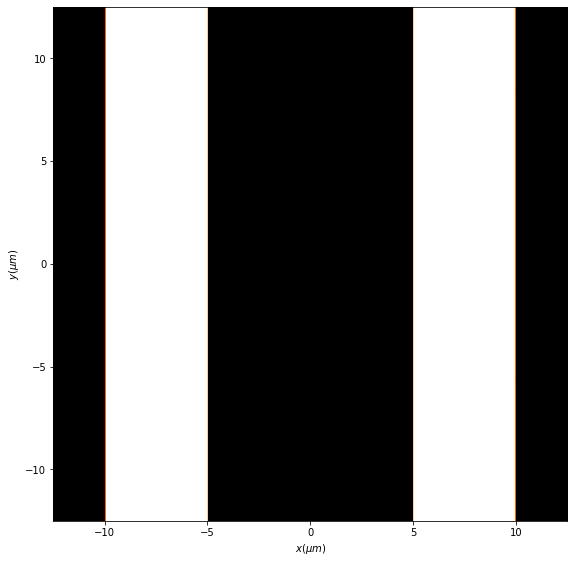

In [14]:
num_data = 512
length = 25 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.double_slit(
    x0=0, size=5 * um, separation=15 * um, angle=0 * degrees)
t1.draw(kind='intensity');

### triangle

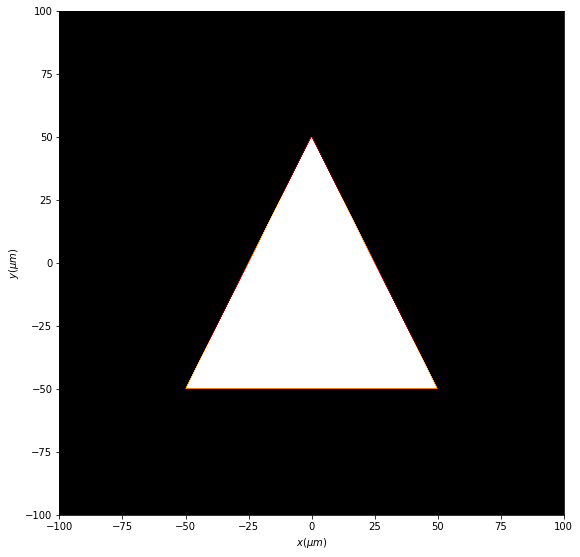

In [15]:
x = np.linspace(-100 * um, 100 * um, 512)
y = np.linspace(-100 * um, 100 * um, 512)
wavelength = 1 * um
t1 = Scalar_mask_XY(x, y, wavelength)

t1.triangle(r0=(0, 50*um), slope=2, height=100 * um, angle=0 * degrees)
t1.draw(kind='intensity');

### square

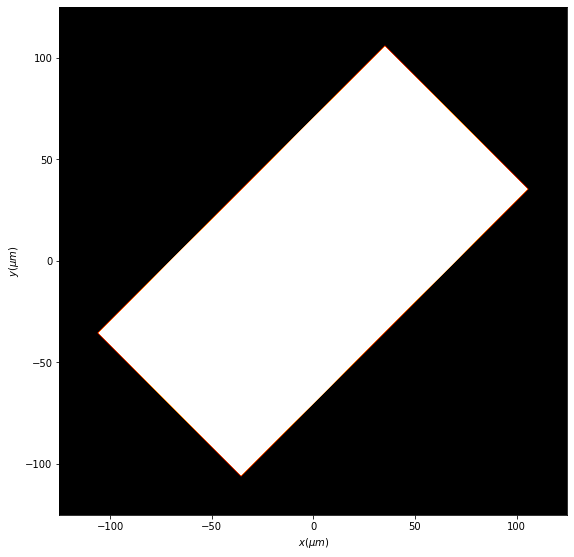

In [16]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.square(
    r0=(0 * um, 0 * um), size=(200 * um, 100 * um), angle=45 * degrees)
t1.draw(kind='intensity');

### circle

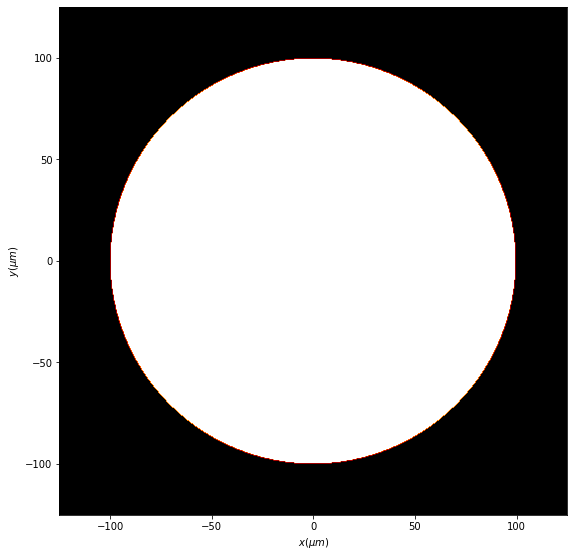

In [17]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.circle(r0=(0 * um, 0 * um), radius=(100 * um, 100 * um))
t1.draw(kind='intensity');

### super_gauss

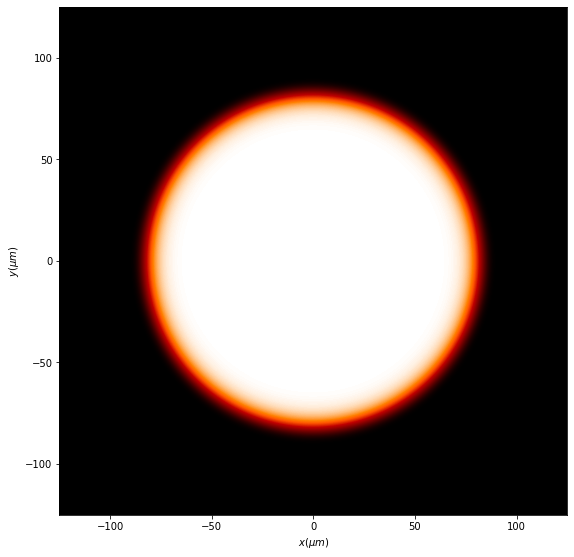

In [18]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.super_gauss(
    r0=(0 * um, 0 * um),
    radius=(length / 3, length / 3),
    angle=45 * degrees,
    potencia=22)
t1.draw(kind='intensity');

### square_circle

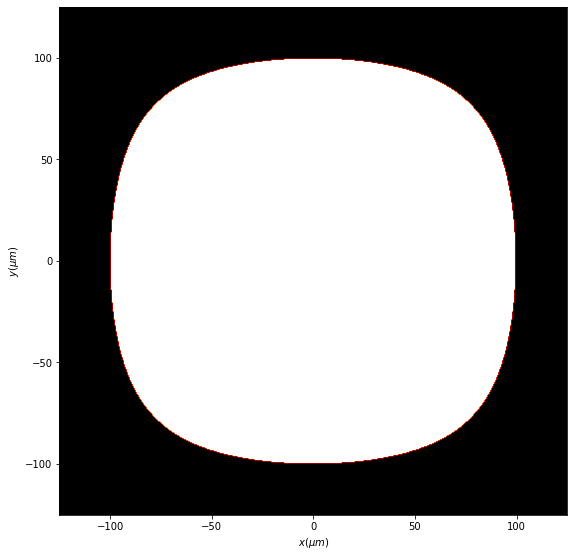

In [19]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.square_circle(
    s=.75,
    r0=(0 * um, 0 * um),
    R1=100 * um,
    R2=100 * um,
    angle=0 * degrees)
t1.draw(kind='intensity');


### elipse

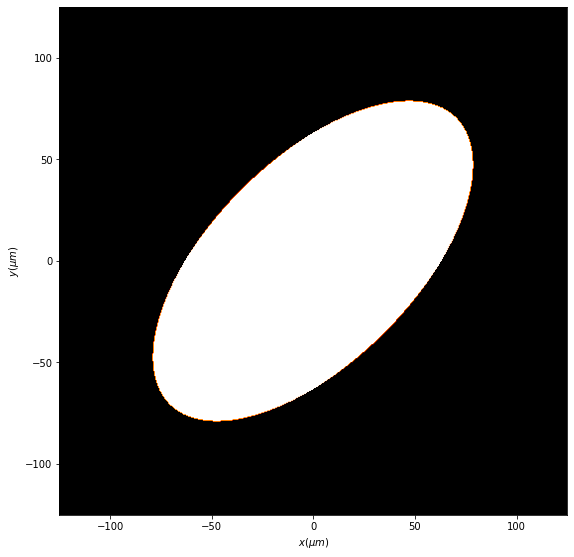

In [20]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.circle(
    r0=(0 * um, 0 * um), radius=(100 * um, 50 * um), angle=45 * degrees)
t1.draw(kind='intensity');

### ring

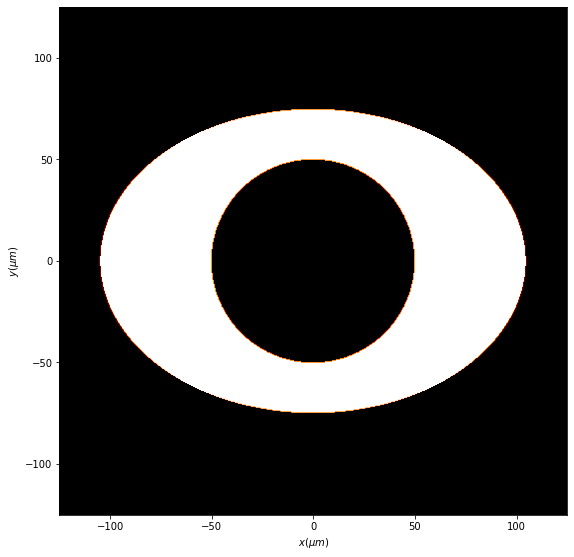

In [21]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.ring(
    r0=(0 * um, 0 * um),
    radius1=(50 * um, 50 * um),
    radius2=(75 * um, 105 * um),
    angle=90 * degrees)
t1.draw(kind='intensity');

### cross

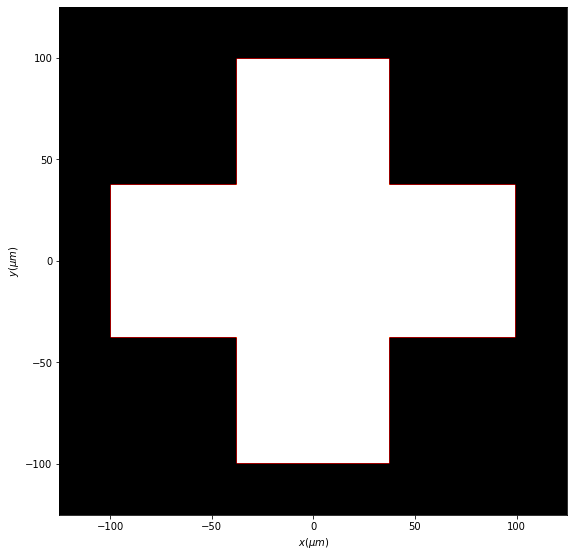

In [22]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.cross(
    r0=(0 * um, 0 * um), size=(200 * um, 75 * um), angle=0 * degrees)
t1.draw(kind='intensity');

### two_levels

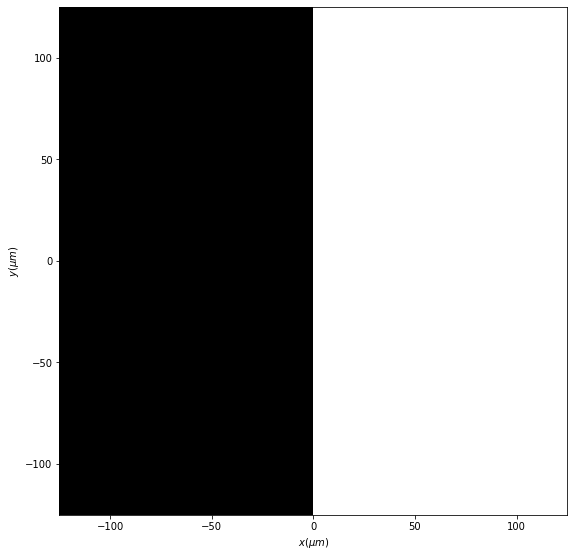

In [23]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.two_levels(level1=0, level2=.5, xcorte=0)
t1.draw(kind='intensity');

### image

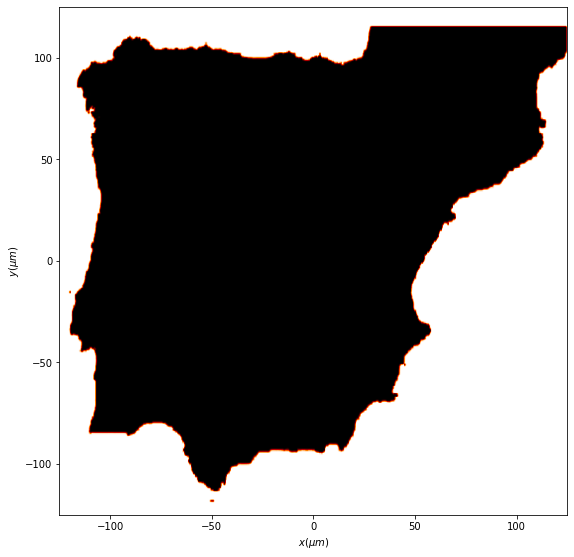

In [24]:
num_data = 1204
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.image(filename="spain.png", normalize=True, canal=0, 
         lengthImage=True, angle=0*degrees)

t1.draw(kind='intensity');

### gray_scale

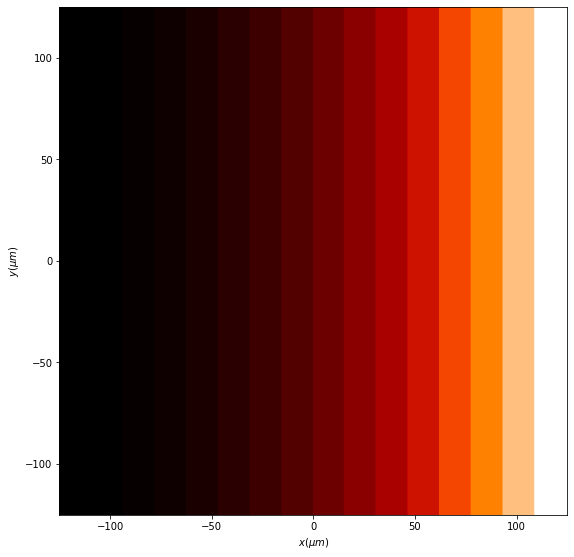

In [25]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.gray_scale(num_levels=16, levelMin=0, levelMax=1)
t1.draw(kind='intensity');

### lens

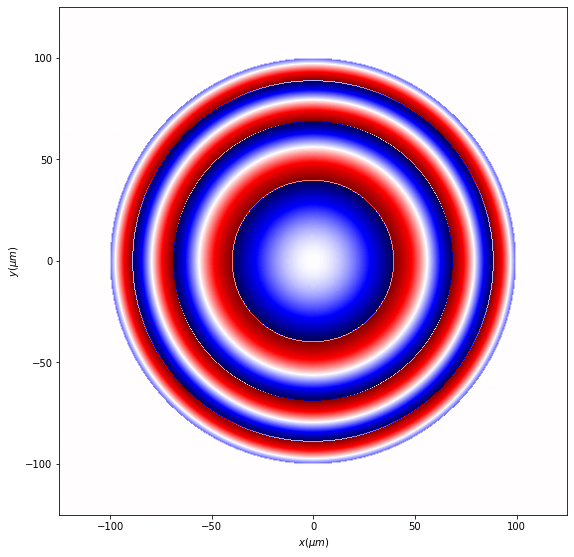

In [26]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t0 = Scalar_mask_XY(x, y, wavelength)
t0.lens(
    r0=(0 * um, 0 * um),
    radius=(100 * um, 100 * um),
    focal=(2.5 * mm, 2.5 * mm),
    angle=0 * degrees)
t0.draw(kind='phase');

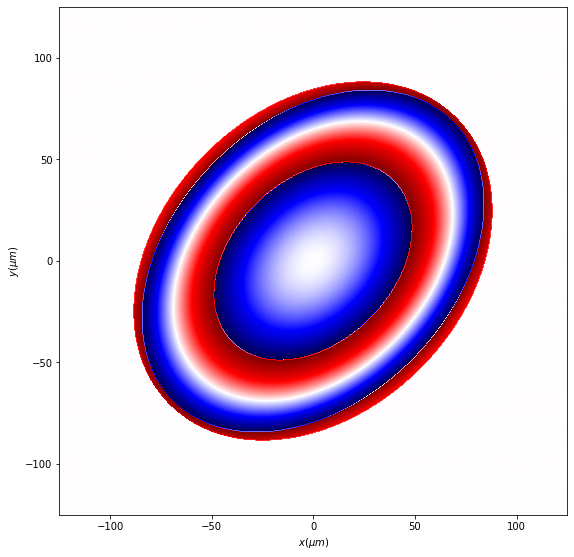

In [27]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.lens(
    r0=(0 * um, 0 * um),
    radius=(100 * um, 75 * um),
    focal=(5 * mm, 2.5 * mm),
    angle=45 * degrees)
t1.draw(kind='phase');

### lens_fresnel

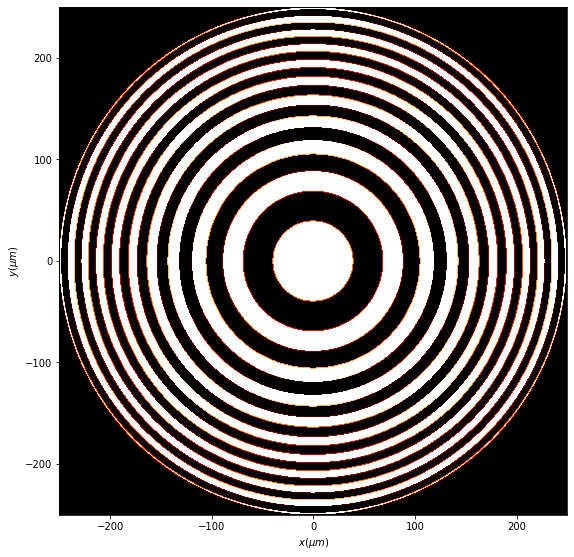

In [28]:
num_data = 512
length = 500 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.fresnel_lens(
    r0=(0 * um, 0 * um),
    radius=(250 * um, 250 * um),
    focal=(5 * mm, 5 * mm),
    angle=45 * degrees,
    kind='amplitude',
    phase=np.pi)
t1.draw(kind='intensity');

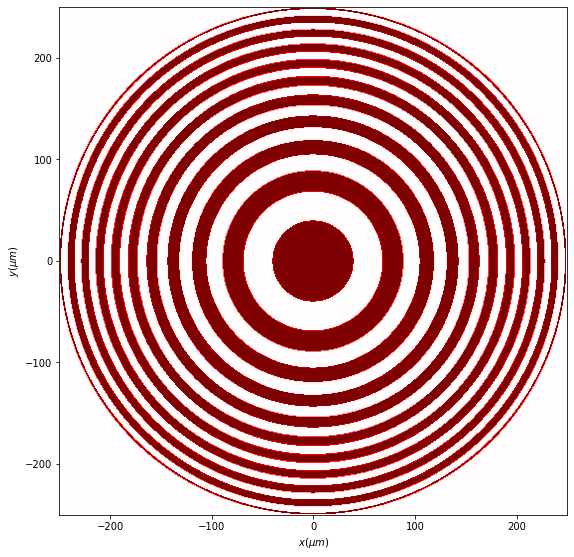

In [29]:
num_data = 512
length = 500 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1.fresnel_lens(
    r0=(0 * um, 0 * um),
    radius=(250 * um, 250 * um),
    focal=(5 * mm, 5 * mm),
    angle=0 * degrees,
    kind='phase',
    phase=np.pi)
t1.draw(kind='phase');

### lens_billet

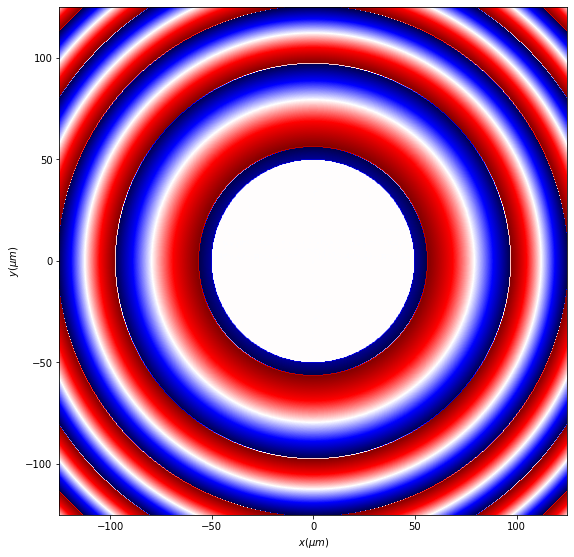

In [30]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.lens_billet(
    r0=(0 * um, 0 * um),
    radius=(200 * um, 200 * um),
    focal=(5 * mm, 5 * mm),
    angle=0 * degrees,
    radius_agujero=50 * um)
t1.draw(kind='phase');

### biprism_fresnel

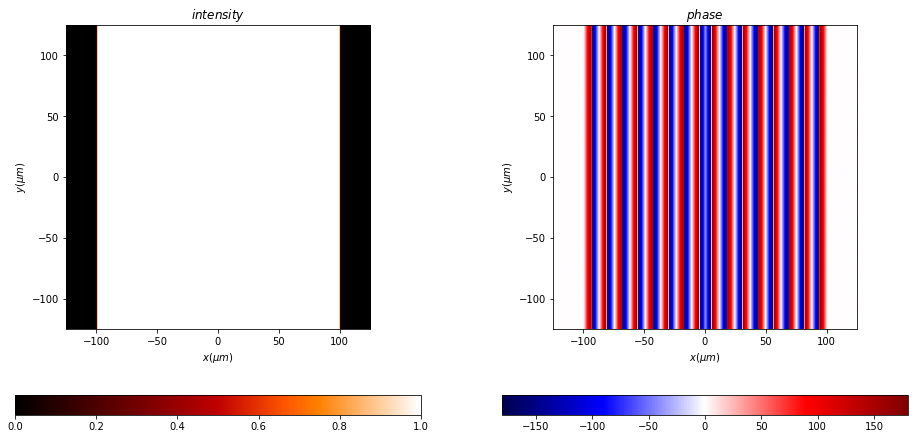

In [31]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.biprism_fresnel(
    r0=(0 * um, 0 * um), width=100 * um, height=5 * um, n=1.5)
t1.draw(kind='field');

### axicon

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fc0e8d2d400>)

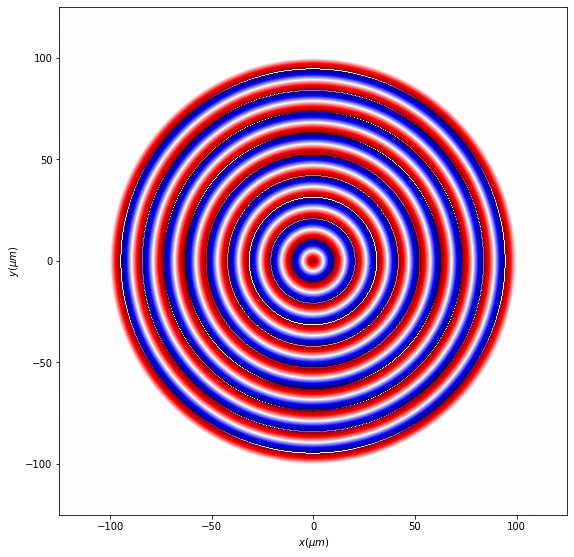

In [32]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.axicon(r0=(0 * um, 0 * um), radius=100 * um, height=6 * um, n=1.5)
t1.draw(kind='phase')

### laguerre_gauss_spiral

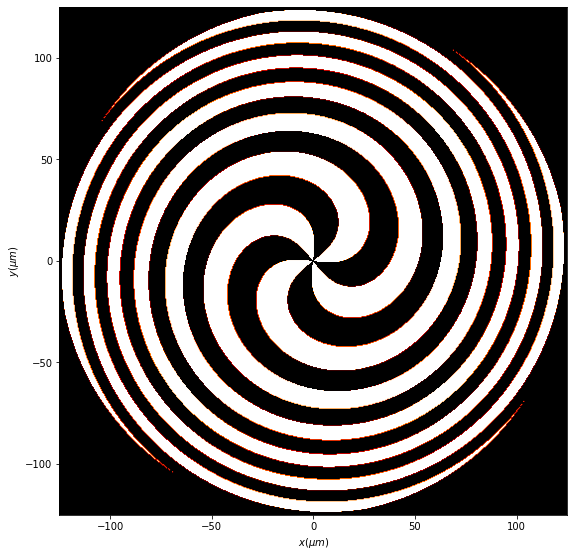

In [33]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t = Scalar_mask_XY(x, y, wavelength)
t.laguerre_gauss_spiral(
    kind='intensity',
    l=4,
    r0=(0 * um, 0 * um),
    w0=20 * um,
    z=0.01 * um)
t.draw(kind='intensity');

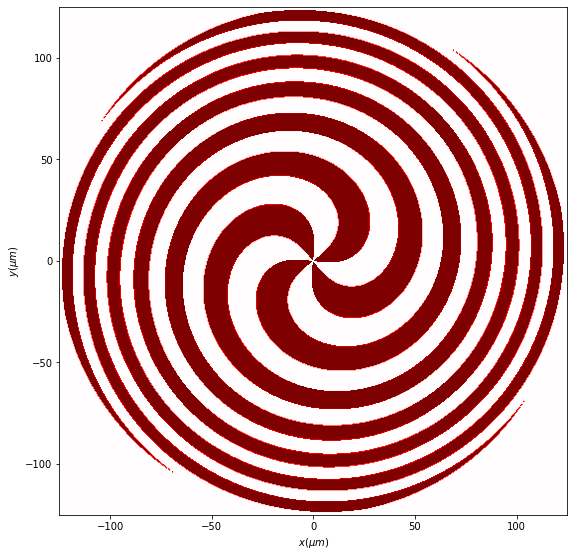

In [34]:
t2 = Scalar_mask_XY(x, y, wavelength)
t2.laguerre_gauss_spiral(
    kind='phase', l=4, r0=(0 * um, 0 * um), w0=20 * um, z=0.01 * um)
t2.draw(kind='phase');

### grating_forked

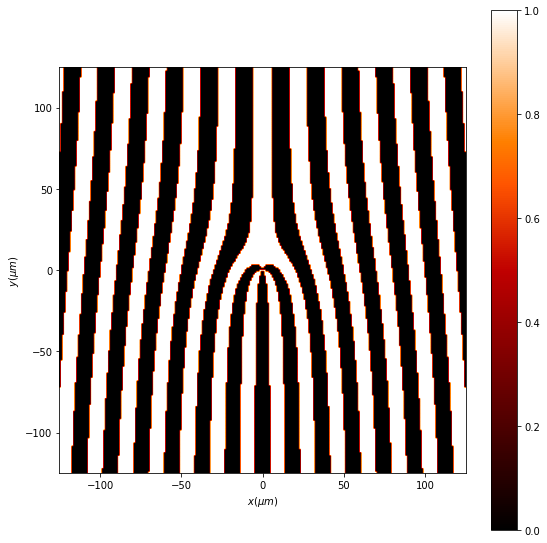

In [35]:
num_data = 256
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t = Scalar_mask_XY(x, y, wavelength)
t.forked_grating(
    r0=(0 * um, 0 * um),
    period=20 * um,
    l=3,
    alpha=2,
    kind='amplitude',
    angle=0 * degrees)
t.draw();
plt.colorbar()

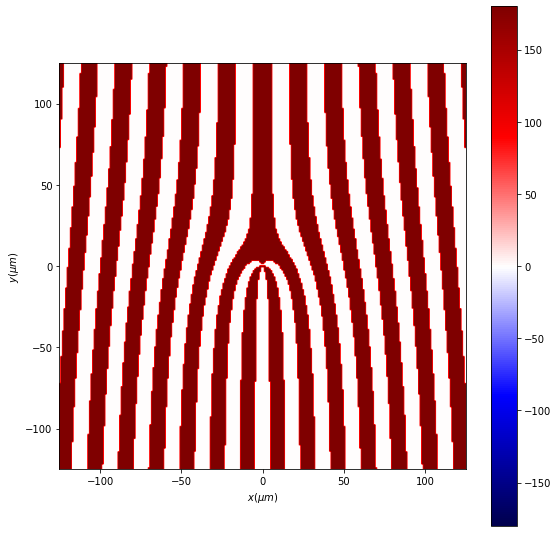

In [36]:
num_data = 256
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t = Scalar_mask_XY(x, y, wavelength)
t.forked_grating(
    r0=(0 * um, 0 * um),
    period=20 * um,
    l=3,
    alpha=2,
    kind='phase',
    angle=0 * degrees)
t.draw(kind='phase');
plt.colorbar()

### roughness

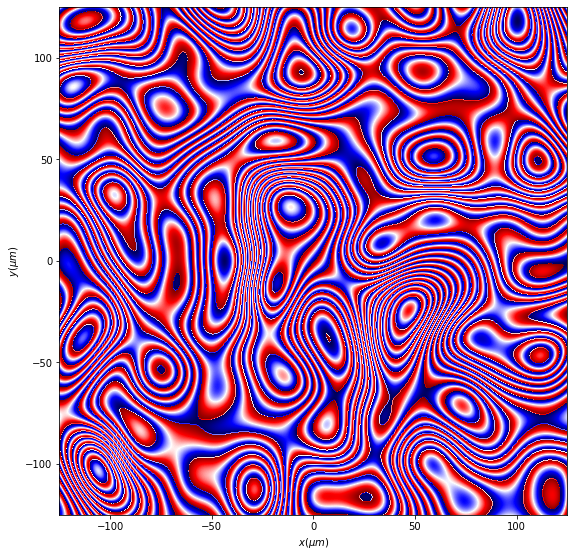

In [37]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.roughness(t=(25 * um, 25 * um), s=1 * um)
t1.draw(kind='phase');

### grating_sine

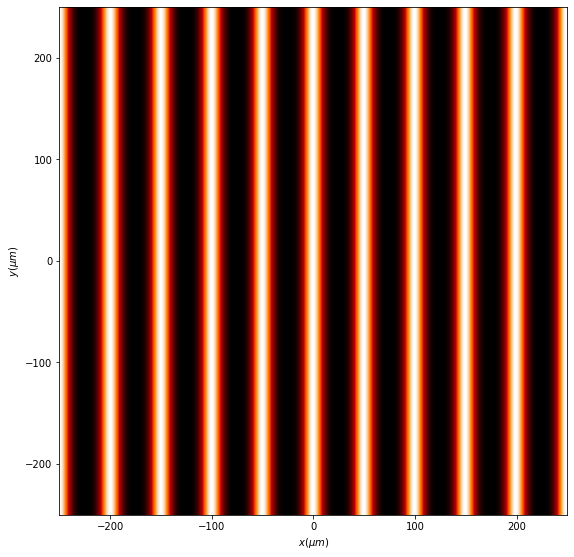

In [38]:
x = np.linspace(-250 * um, 250 * um, 512)
y = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
period = 50 * um
red = Scalar_mask_XY(x, y, wavelength)
red.sine_grating(
    period=period, amp_min=0, amp_max=1, x0=0 * um, angle=0 * degrees)
red.draw(kind='intensity');

### grating_Ronchi

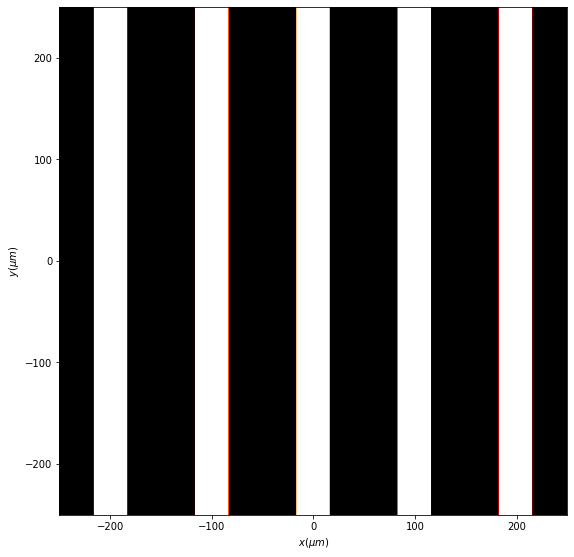

In [39]:
x = np.linspace(-250 * um, 250 * um, 512)
y = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
red = Scalar_mask_XY(x, y, wavelength)
red.ronchi_grating(
    period=100 * um, x0=0 * um, angle=0 * degrees, fill_factor=0.333)
red.draw(kind='intensity');

### grating_binary_amplitude

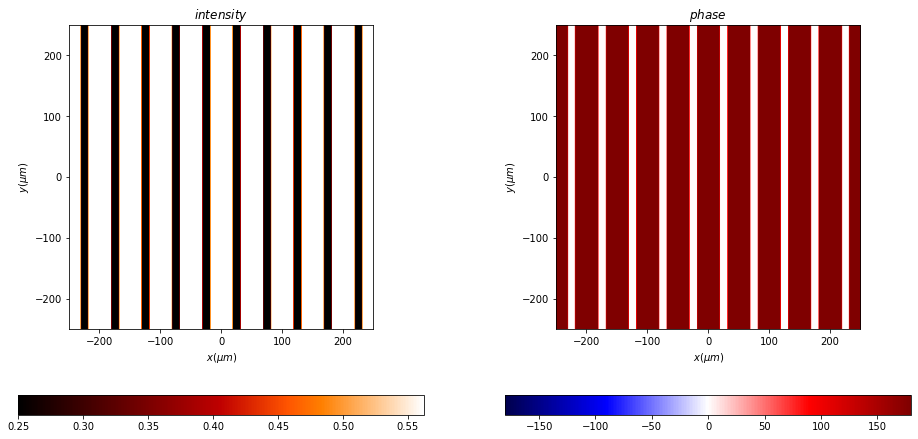

In [40]:
x = np.linspace(-250 * um, 250 * um, 512)
y = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
red = Scalar_mask_XY(x, y, wavelength)
red.binary_grating(
    period=50 * um,
    amin=.5,
    amax=.75,
    phase=np.pi,
    x0=0,
    fill_factor=0.75,
    angle=0 * degrees)
red.draw(kind='field');

### grating_binary_phase

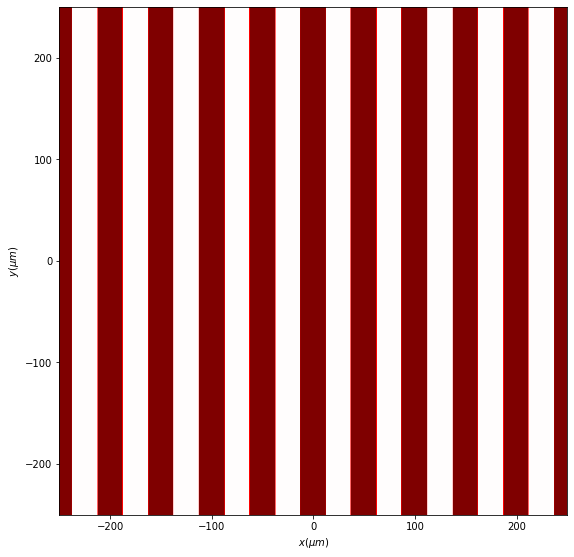

In [41]:
x = np.linspace(-250 * um, 250 * um, 512)
y = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
red = Scalar_mask_XY(x, y, wavelength)
red.binary_grating(
    period=50 * um,
    amin=1,
    amax=1,
    phase=np.pi,
    x0=0,
    fill_factor=0.5,
    angle=0 * degrees)
red.draw(kind='phase');

### grating_blazed

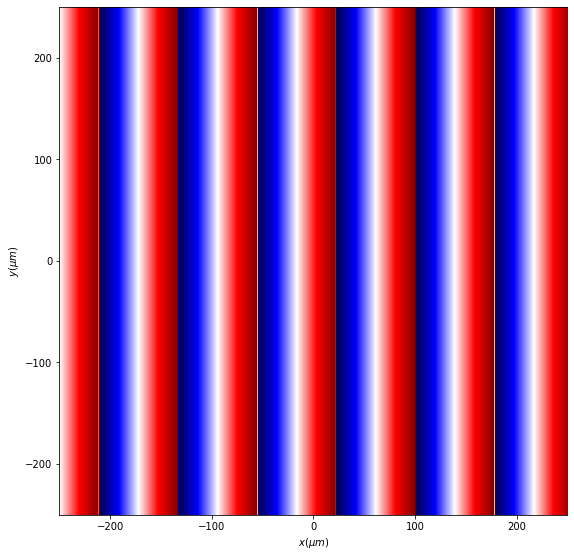

In [42]:
x = np.linspace(-250 * um, 250 * um, 512)
y = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
period = 125 * um
red = Scalar_mask_XY(x, y, wavelength)
red.blazed_grating(
    period=period, height=2 * um, index=1.5, x0=0, angle=0 * degrees)
red.draw(kind='phase');

### grating_2D

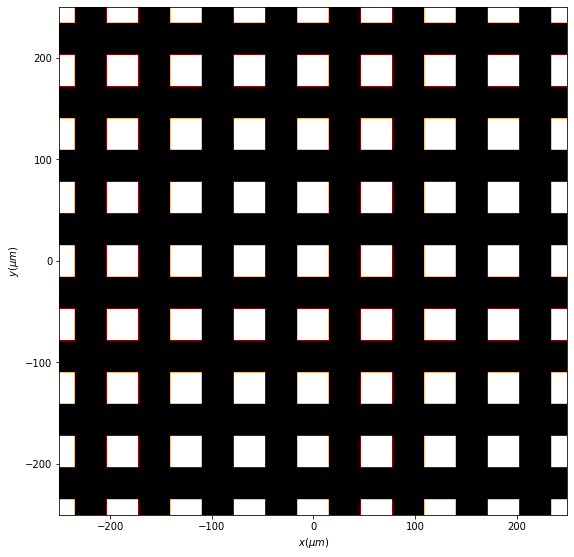

In [43]:
x = np.linspace(-250 * um, 250 * um, 512)
y = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
period = 62.5 * um
red = Scalar_mask_XY(x, y, wavelength)
red.grating_2D(
    period=period,
    amin=0,
    amax=1.,
    phase=0 * np.pi / 2,
    x0=0,
    fill_factor=0.5,
    angle=0 * degrees)
red.draw(kind='intensity');

### grating_chess

In [44]:
x = np.linspace(-250 * um, 250 * um, 512)
y = np.linspace(-250 * um, 250 * um, 512)
wavelength = 0.6238 * um
period = 125 * um
red = Scalar_mask_XY(x, y, wavelength)
red.grating_2D_chess(
    period=period,
    amin=0,
    amax=1.,
    phase=0 * np.pi / 2,
    x0=0,
    fill_factor=0.75,
    angle=0 * degrees)
red.draw(kind='intensity');

TypeError: only size-1 arrays can be converted to Python scalars

### circle_rough

In [ ]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6238 * um

t = Scalar_mask_XY(x, y, wavelength)
t.circle_rough(
    r0=(0, 0),
    radius=100 * um,
    angle=0 * degrees,
    sigma=4 * um,
    correlation_length=.1 * um)
t.draw(kind='intensity');

### ring_rough

In [ ]:
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)

wavelength = 0.6238 * um

t = Scalar_mask_XY(x, y, wavelength)
t.ring_rough(
    r0=(0, 0),
    radius1=50 * um,
    radius2=100 * um,
    angle=0 * degrees,
    sigma=4 * um,
    correlation_length=.1 * um)
t.draw(kind='intensity');

### widen

In [ ]:
num_data = 512
length = 250 * um
x = np.linspace(-length / 2, length / 2, num_data)
y = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.6328 * um

t1 = Scalar_mask_XY(x, y, wavelength)
t1.ring(
    r0=(0 * um, 0 * um),
    radius1=(50 * um, 50 * um),
    radius2=(60 * um, 60 * um),
    angle=45 * degrees)
t1.draw()

t2=t1.widen(radius=25 * um, new_field=True, binarize=True)
t2.draw();